In [1]:
# scikit-learnライブラリから必要な関数 load_breast_cancer() を import
from sklearn.datasets import load_breast_cancer

In [2]:
# X に特徴量、y に目的変数、feature_names に特徴量名がロード
breast_cancer = load_breast_cancer()
x = breast_cancer.data #特徴量
y = breast_cancer.target #目的変数
feature_names = breast_cancer.feature_names #特徴量名

In [3]:
# feature_names を確認
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# google翻訳してみる
!pip install googletrans

  Stored in directory: /home/jovyan/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [5]:
from googletrans import Translator

translator = Translator()

translated_list=[]
for feature_name in feature_names:
    print(feature_name)
    tags = translator.translate(feature_name, dest='ja')
    print(tags)
    translated_list.append(tags)
    print('')

mean radius
Translated(src=en, dest=ja, text=平均半径, pronunciation=None, extra_data="{'translat...")

mean texture
Translated(src=en, dest=ja, text=平均テクスチャ, pronunciation=None, extra_data="{'translat...")

mean perimeter
Translated(src=en, dest=ja, text=平均周長, pronunciation=None, extra_data="{'translat...")

mean area
Translated(src=en, dest=ja, text=平均面積, pronunciation=None, extra_data="{'translat...")

mean smoothness
Translated(src=en, dest=ja, text=滑らかさ, pronunciation=None, extra_data="{'translat...")

mean compactness
Translated(src=en, dest=ja, text=コンパクトさを意味する, pronunciation=None, extra_data="{'translat...")

mean concavity
Translated(src=en, dest=ja, text=凹面, pronunciation=None, extra_data="{'translat...")

mean concave points
Translated(src=en, dest=ja, text=平均凹点, pronunciation=None, extra_data="{'translat...")

mean symmetry
Translated(src=en, dest=ja, text=平均対称, pronunciation=None, extra_data="{'translat...")

mean fractal dimension
Translated(src=en, dest=ja, text=平均フラクタル次元, p

In [6]:
# Xの全ての行と10列目までを取り出す。
x = x[:, :10]

In [7]:
# 日本語の特徴量名を用意する
columns = ['半径', 'テクスチャ', '周囲の長さ', '面積', 'なめらかさ', 'コンパクト性', 'へこみ', 'へこみの数', '対称性', 'フラクタル次元']

In [8]:
# x,y,columnsのデータフレームを作成
from pandas import DataFrame

df = DataFrame(data = x[:, :10], columns = columns)
df['目的変数'] = y
# 下から5行を表示する
df.tail()

,半径,テクスチャ,周囲の長さ,面積,なめらかさ,コンパクト性,へこみ,へこみの数,対称性,フラクタル次元,目的変数
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,1


In [9]:
# 統計値を見る
df.describe()

,半径,テクスチャ,周囲の長さ,面積,なめらかさ,コンパクト性,へこみ,へこみの数,対称性,フラクタル次元,目的変数
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000


In [17]:
# 10個の特徴量から2個の特徴量を選んでそれぞれの組み合わせで平面にプロット
from matplotlib import pyplot
# ! pip install  japanize_matplotlib
import japanize_matplotlib
from pandas.plotting import scatter_matrix

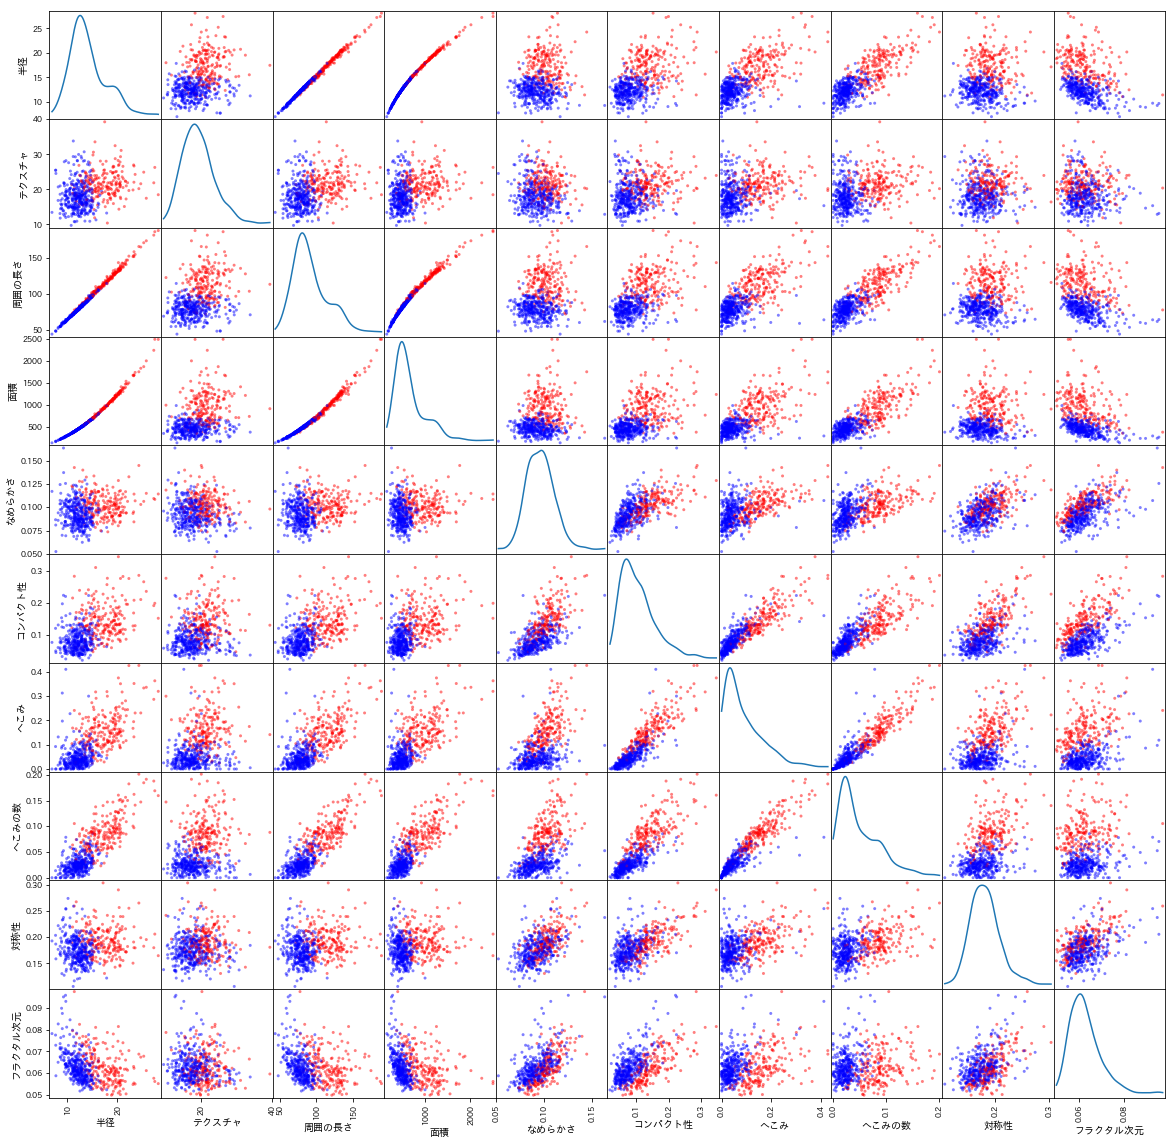

In [16]:
# 悪性の腫瘍を赤色、良性の腫瘍を青色にする
colors = ['red' if v == 0 else 'blue' for v in y]

# 散布図の描画
axes = scatter_matrix(df[columns], figsize = (20, 20), diagonal = 'kde', c = colors)